<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/Linear_Regression_Rsquare_Adjusted_Rsquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


Objective: Use Rsquare and Adjusted R square for feature selection


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
data=pd.read_csv("Advertising.csv", index_col=0)

In [123]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [69]:
print(data.info(),'\n')
print(data.shape,'\n')
print(data.isna().sum(),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 17.8 KB
None 

(200, 4) 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 



**EDA**

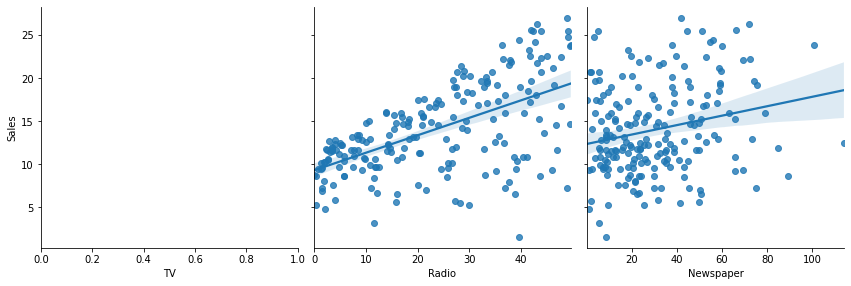

In [32]:
#visualize the relationship between dependent (Sales) and independent variables (TV, Radio,Newspaper)

sns.pairplot(data,x_vars=['TV', 'Radio', 'Newspaper'] , y_vars='Sales', height=4, kind='reg')

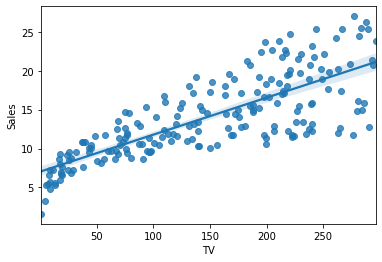

In [40]:
sns.regplot( x=data['TV'], y=data['Sales'])

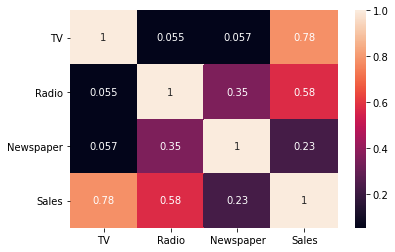

In [34]:
sns.heatmap( data.corr(), annot=True, fmt='.2g')

#TV Sales has strong correlation of all

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [43]:
#Instantiate

LR=LinearRegression()

In [176]:
Feature_cols=['TV','Radio','Newspaper']

X=data[Feature_cols]
y=data.iloc[:,-1]

Train-test split


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit the model
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
print(list(zip(Feature_cols,LR.coef_)))
print(LR.intercept_)

[('TV', 0.04466512063271281), ('Radio', 0.19663006282624831), ('Newspaper', 0.006074386547886862)]
2.758071619217107


In [179]:
#Predict

y_pred=LR.predict(X_test)

In [99]:
data.head(1)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1


In [180]:
LR.predict([[230.1, 37.8, 69.2]])

array([20.8884798])

Evaluation metrics


In [181]:
print("mean absolute error",metrics.mean_absolute_error(y_test, y_pred))
print("mean square error",metrics.mean_squared_error(y_test, y_pred))
print("root mean square error",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean absolute error 1.4937750024728969
mean square error 3.7279283306815096
root mean square error 1.9307843822347202


In [182]:
print("R square: ",metrics.r2_score(y_test, y_pred))
print("Rsquared: ",LR.score(X,y))
Rsquared= metrics.r2_score(y_test, y_pred)
#LR.score(X,y)

R square:  0.8555568430680086
Rsquared:  0.8949450428999699


In [183]:
#Calculate adjusted R square for feature selection

n=len(X) #sample size
k=len(X.columns) #no of independent variable

In [184]:

Adj_Rsqr= 1-((1-Rsquared)*(n-1)/(n-k-1))
print("R squared: ",Rsquared)
print("Adjusted R square: ",Adj_Rsqr)

0.8555568430680086
0.8533459784210904


*   The adjusted R-squared increases only if the new variable improves the model.
*   Adjusted Rsquare will always be leass than R square

#Feature selection 
(using R square and Adjusted R square)

In [188]:
#with TV, Radio
Feature_cols=['TV','Radio']#,'Newspaper']

X=data[Feature_cols]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit the model
LR.fit(X_train, y_train)

print(list(zip(Feature_cols,LR.coef_)))
print(LR.intercept_)

print()
#Predict
y_pred=LR.predict(X_test)

print("mean square error",metrics.mean_squared_error(y_test, y_pred))
print()
Rsquared= metrics.r2_score(y_test, y_pred)

n=len(X) #sample size
k=len(X.columns) #no of independent variable

Adj_Rsqr= 1-((1-Rsquared)*(n-1)/(n-k-1))
print("R squared: ",Rsquared)
print("Adjusted R square: ",Adj_Rsqr)

[('TV', 0.04473961964873228), ('Radio', 0.19935546409914867)]
2.867354533937725

mean square error 3.630085444083252

R squared:  0.8593478857517631
Adjusted R square:  0.8579199455055881


In [189]:
#with TV only
Feature_cols=['TV']#,'Radio']#,'Newspaper']

X=data[Feature_cols]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit the model
LR.fit(X_train, y_train)

print(list(zip(Feature_cols,LR.coef_)))
print(LR.intercept_)
print()
#Predict

y_pred=LR.predict(X_test)

print("mean square error",metrics.mean_squared_error(y_test, y_pred))
print()
Rsquared= metrics.r2_score(y_test, y_pred)

n=len(X) #sample size
k=len(X.columns) #no of independent variable

Adj_Rsqr= 1-((1-Rsquared)*(n-1)/(n-k-1))
print("R squared: ",Rsquared)
print("Adjusted R square: ",Adj_Rsqr)

[('TV', 0.04822451281515249)]
7.066582521696444

mean square error 9.712207417121473

R squared:  0.6236886078089201
Adjusted R square:  0.6217880452220965


Thus, Based on Rsquared and adjusted R square , we will include ['TV', Radio'] sales as independent variable for predicting sales.